#**Mine Projeto: Data-Driven Insights**
###Autor: Juliete da Silva

###1. Importando bibliotecas

In [54]:
import pandas as pd  # Para análise de dados em tabelas
import numpy as np    # Para operações com números e vetores
import matplotlib.pyplot as plt  # Para fazer gráficos

###2. Carregamento e exploração inicial

In [55]:
# Carregando o arquivo CSV
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [56]:
#Listando as cinco primeiras linhas para exploração inicial do dataset
print("As 5 primeiras linhas do DataFrame:")
print(df.head())

As 5 primeiras linhas do DataFrame:
  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0       10107             30.0      95.70              2.0  2871.00   
1       10121             34.0      81.35              5.0  2765.90   
2       10134             41.0      94.74              2.0  3884.34   
3       10145             45.0      83.26              6.0  3746.70   
4       10159             49.0     100.00             14.0  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped     1.0       2.0   2003.0  ...   
1    5/7/2003 0:00  Shipped     2.0       5.0   2003.0  ...   
2    7/1/2003 0:00  Shipped     3.0       7.0   2003.0  ...   
3   8/25/2003 0:00  Shipped     3.0       8.0   2003.0  ...   
4  10/10/2003 0:00  Shipped     4.0      10.0   2003.0  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59

In [57]:
#Listando a quantidade de linhas e colunas
print("\nShape (linhas, colunas):", df.shape)


Shape (linhas, colunas): (2823, 25)


In [58]:
#Listando as colunas
print("\nNome das colunas:", df.columns)


Nome das colunas: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [59]:
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
ORDERNUMBER          object
QUANTITYORDERED     float64
PRICEEACH           float64
ORDERLINENUMBER     float64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID              float64
MONTH_ID            float64
YEAR_ID             float64
PRODUCTLINE          object
MSRP                float64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


###3. Trabalhando com Listas, Dicionários e Tuplas

In [60]:
# Criando uma lista com os primeiros nomes da coluna PRODUCTLINE
nomes = list(df['PRODUCTLINE'])
for nome in nomes[:5]:
    print(nome)


Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles


In [61]:
# Criando um dicionário com pares: produto : cliente
dicionario = dict(zip(df['PRODUCTLINE'][:3], df['CUSTOMERNAME'][:3]))
print(dicionario)

{'Motorcycles': 'Lyon Souveniers'}


In [62]:
# Criando uma tupla com dados mistos da primeira linha
linha0 = df.iloc[0]
minha_tupla = (linha0['PRODUCTLINE'], linha0['CUSTOMERNAME'], linha0['PRICEEACH'])
print(minha_tupla)

('Motorcycles', 'Land of Toys Inc.', np.float64(95.7))


Observei quando listei os 5 primeiros valores da coluna PRODUCTLINE, que todos pertencem à categoria “Motorcycles”, sugerindo grande concentração de vendas nessa linha de produto nas primeiras linhas dessa base.
Ao criar o dicionário produto:cliente, apenas um par foi retornado — {'Motorcycles': 'Lyon Souveniers'} — pois todas as chaves eram repetidas e o dicionário manteve apenas o último valor.

###4. Estruturas Condicionais e Laços

In [63]:
#Aqui pegamos o primeiro número da coluna que escolhemos, para testar com condições
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]

In [64]:
# Condição simples para classificar o valor
if primeiro_valor > 100:
    print("Valor alto")
elif primeiro_valor > 50:
    print("Valor intermediário")
else:
    print("Valor baixo")

Valor alto


In [65]:
#Identificando o valor encontrado da condição
print(df[coluna_numerica][0])

2871.0


In [66]:
# Usando for para somar os primeiros 5 valores da coluna SALES
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores das vendas:", soma)


Soma dos 5 primeiros valores das vendas: 18473.21


In [67]:
# Mostrando os 5 primeiros valores da lista
lista

[2871.0, 2765.9, 3884.34, 3746.7, 5205.27]

In [68]:
# Usando while para encontrar o primeiro valor acima de 3000
limite = 3000
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Primeiro valor > 3000 encontrado: 3884.34


A primeira venda registrada na coluna SALES foi de 2.871,00 reais, classificada como valor alto pela regra definida.
A soma das 5 primeiras vendas resultou em 18.473,21 com uma média aproximada de 3.694,64 por venda, reforçando um padrão de vendas elevantes logo nas primeiras transações.

O laço while identificou que a primeira venda acima de 3.000,00 foi de 3.884,34, localizada na 3ª posição da lista.

###5. Operadores Aritméticos e Manipulação de Dados

In [69]:
#Criando novas colunas
# Criar uma nova coluna com o valor líquido da venda (descontando 15% de comissão)
df['SALES_LIQUIDO'] = df['SALES'] * 0.85
print(df[['SALES', 'SALES_LIQUIDO']].head())


     SALES  SALES_LIQUIDO
0  2871.00      2440.3500
1  2765.90      2351.0150
2  3884.34      3301.6890
3  3746.70      3184.6950
4  5205.27      4424.4795


In [70]:
print(df['SALES_LIQUIDO'].min())
print(df['SALES_LIQUIDO'].max())

459.969
11970.38


In [71]:
# Calcular a comissão como a diferença entre o valor bruto e o valor líquido
df['COMISSAO'] = df['SALES'] - df['SALES_LIQUIDO']

# Exibir as 5 primeiras linhas com as 3 colunas
print(df[['SALES', 'SALES_LIQUIDO', 'COMISSAO']].head())


     SALES  SALES_LIQUIDO  COMISSAO
0  2871.00      2440.3500  430.6500
1  2765.90      2351.0150  414.8850
2  3884.34      3301.6890  582.6510
3  3746.70      3184.6950  562.0050
4  5205.27      4424.4795  780.7905


Ao aplicar um desconto de 15% referente à comissão sobre o valor bruto (SALES), observou-se que o valor líquido das vendas varia entre 459,97 e 11.970,38.

Com base nisso, foi possível calcular o valor da comissão paga, que é a diferença entre o valor bruto e o valor líquido. O valor das comissões variou de 81,17 a 2.111,82.

Esse intervalo mostra que existem vendas de diferentes portes, indicando uma carteira diversificada de clientes — desde compras pequenas até transações de alto valor que geram comissões expressivas para os vendedores.

###6. Operações com NumPy e Arrays Numéricos

In [75]:
array = np.array(df['QUANTITYORDERED'])
array_5_elementos = array[:5]

print("Array dos 5 primeiros elementos:",array_5_elementos)
print("Array somado +10:", (array + 10)[:5])
print("Array ao quadrado:", (array ** 2)[:5])

print("Soma dos elementos:", np.nansum(array))
print("Média dos elementos:", np.nanmean(array))

Array dos 5 primeiros elementos: [30. 34. 41. 45. 49.]
Array somado +10: [40. 44. 51. 55. 59.]
Array ao quadrado: [ 900. 1156. 1681. 2025. 2401.]
Soma dos elementos: 52988.0
Média dos elementos: 35.13793103448276


In [73]:
# Acessando valores pelo índice
print(array[0])   # Primeiro valor
print(array[3])   # Quarto valor
print(array[-1])  # Último valor
print(array[-2])  # Penúltimo valor

# Fatiamento
print(array[:5]) #Pegar os 5 primeiros
print(array[5:11]) #Do item 5 até o 10

print(array[0])
#Modificando os valores do array
array[0] = 100
print(array[0])
array[0:3] = [11, 22, 33]  # troca os 3 primeiros valores
print(array[:3])


30.0
45.0
47.0
34.0
[30. 34. 41. 45. 49.]
[36. nan nan 22. nan nan]
30.0
100.0
[11. 22. 33.]


O array NumPy da coluna “QUANTITYORDERED” mostrou que os cinco primeiros pedidos são 30. 34. 41. 45. 49, com o valor mais alto sendo 49 — indicando que as vendas têm volume médio-alto e não são microtransações.

###7. Acessando e Manipulando  Dados com Pandas

In [79]:
# Checando a quantidade de vendas por países
df['COUNTRY'].value_counts()

,count
COUNTRY,
USA,969
Italy,113
France,81
Denmark,63
Austria,55
Canada,44
Sweden,38
Singapore,36
Norway,32


In [80]:
# Selecionar vendas feitas apenas nos EUA:
vendas_usa = df.loc[df['COUNTRY'] == 'USA']
# Checagem do resultado do filtro para vendas apenas nos USA(Não pode aparecer outros países)
vendas_usa['COUNTRY'].value_counts()

,count
COUNTRY,
USA,969


In [82]:
#Selecionar as 5 primeiras linhas dp dataframe (exemplo de slice):
df.iloc[:5]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES_LIQUIDO,COMISSAO
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2440.3500,430.6500
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2351.0150,414.8850
2,10134,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3301.6890,582.6510
3,10145,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3184.6950,562.0050
4,10159,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4424.4795,780.7905


In [84]:
#Quantas vendas por categoria (PRODUCTLINE)?
df['PRODUCTLINE'].value_counts()

,count
PRODUCTLINE,
Classic Cars,485
Vintage Cars,336
Motorcycles,187
Trucks and Buses,165
Planes,164
Ships,131
Trains,40


In [85]:
 # Soma de vendas (SALES) por país(COUNTRY) ordenado de modo decrescente
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

,SALES
COUNTRY,
USA,3512427.40
Italy,374674.31
France,284101.72
Denmark,245637.15
Austria,202062.53
Canada,149443.71
Sweden,134259.33
Norway,116599.19
Singapore,115498.73


In [86]:
# Média das vendas por linha de produto (PRODUCTLINE)de modo decrescente
df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)

,SALES
PRODUCTLINE,
Classic Cars,4125.086021
Trucks and Buses,3625.759879
Motorcycles,3535.337594
Planes,3318.012256
Vintage Cars,3166.757917
Trains,3128.028250
Ships,2966.428473


Com base na análise dos dados de vendas, observamos que o mercado dos Estados Unidos concentra o maior faturamento (acima de R\$ 3,5 milhões), demonstrando ser o principal foco comercial da empresa. Entre os produtos, a categoria **"Classic Cars"** se destaca como líder absoluta, tanto em **quantidade de pedidos (485)** quanto em **ticket médio (R\$ 4.125 por venda)**, indicando forte apelo e alto valor agregado. Em contrapartida, categorias como **"Trains"** e **"Ships"** apresentam baixo volume e média de vendas reduzida, sugerindo potencial de reavaliação estratégica. Esses dados apontam oportunidades claras para **reforçar campanhas e estoques nos EUA** e **focar em produtos de maior lucratividade**, ao mesmo tempo em que sinalizam a necessidade de otimizar ou redirecionar investimentos em linhas com menor desempenho.

###8.Visualização de Dados

In [87]:
#Checando a situação da data dos pedidos na coluna(ORDERDATE)
df['ORDERDATE']

,ORDERDATE
0,2/24/2003 0:00
1,5/7/2003 0:00
2,7/1/2003 0:00
3,8/25/2003 0:00
4,10/10/2003 0:00
...,...
2818,NaN
2819,NaN
2820,NaN
2821,3/28/2005 0:00


Verifiquei e identifiquei inconsistência na coluna ORDERDATE.

Ações:
- Converter ORDERDATE para o tipo datetime utilizando pd.to_datetime.

- Tratar os valores inválidos que forem convertidos para NaT (valores nulos).

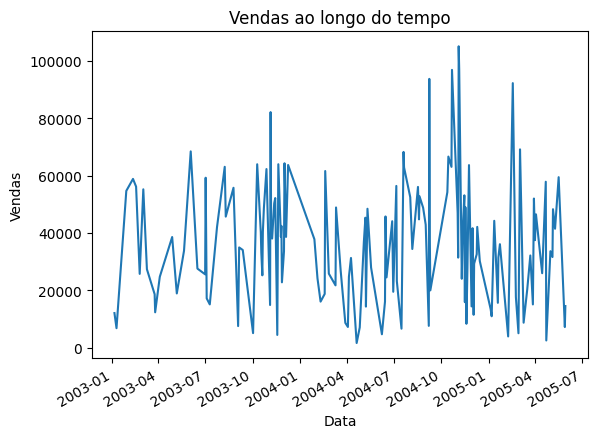

In [89]:
#Convertendo para datetime e tratando os nulos(errors='coerce)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Plotando gráficos de Linha(kind='line') - Total de vendas ao longo do tempo
df.groupby('ORDERDATE')['SALES'].sum().plot(kind='line', title='Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()

###Insights do gráfico de linhas
- Alta variabilidade mensal: Entre janeiro de 2003 e julho de 2005, as vendas mostram flutuações bruscas, sem tendência clara de crescimento ou queda sustentada.

- Picos de vendas: Notam-se altos volumes de venda entre setembro de 2004 e fevereiro de 2005, com valores ultrapassando R$ 100.000 em alguns dias — indicando ações promocionais, sazonalidade ou campanhas específicas nesse período.

- Períodos de baixa: Várias quedas acentuadas ocorrem, especialmente em abril de 2003, março de 2004 e julho de 2005, sugerindo sazonalidade negativa ou falta de campanhas nesses meses.

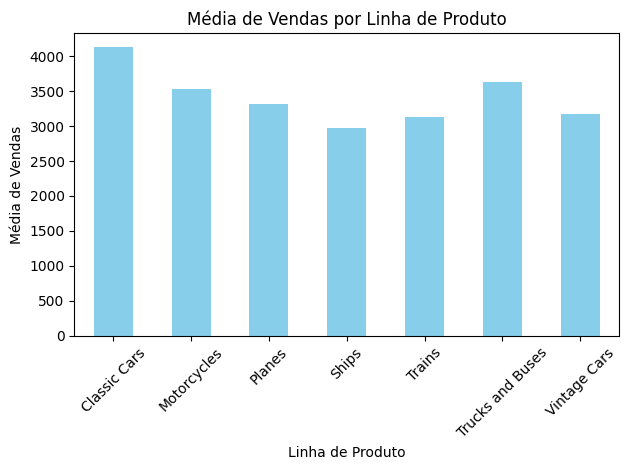

In [90]:
# Plotando o gráfico de barras- Média de vendas por linha de produto
# Agrupar por categoria de produto e calcular a média de vendas

df.groupby('PRODUCTLINE')['SALES'].mean().plot(kind='bar', color='skyblue')

# Personalização do gráfico
plt.title('Média de Vendas por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Insights do gráfico de barras
- Classic Cars lidera com folga
A linha "Classic Cars" tem a maior média de vendas, superando R$ 4.000 por pedido — indicando forte valor agregado por transação.

- Motorcycles e Trucks and Buses também se destacam
Ambas apresentam médias acima de R$ 3.500, ficando entre os produtos de maior rentabilidade média da empresa.

- Ships e Trains têm menor desempenho médio
Essas categorias ficam com médias próximas de R$ 3.000, sugerindo produtos com menor ticket médio ou relevância comercial reduzida.

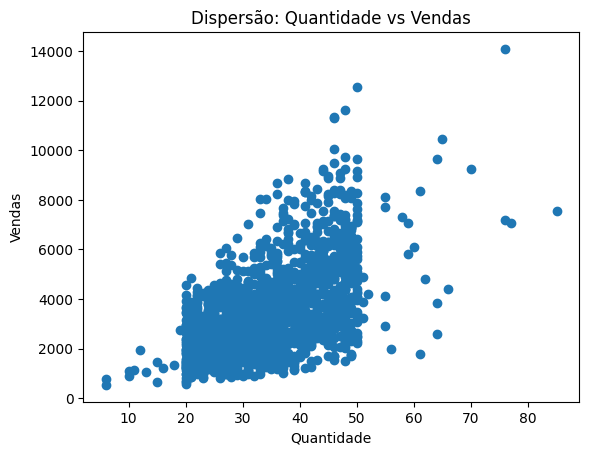

In [91]:
# Gráfico de Dispersão
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.title('Dispersão: Quantidade vs Vendas')
plt.xlabel('Quantidade')
plt.ylabel('Vendas')
plt.show()

###Insights do gráfico de dispersão
- Correlação positiva geral:
A maior parte dos pontos concentra-se entre quantidades de 20 a 50 e valores de venda entre R$ 2.000 e R$ 8.000, indicando uma relação direta: quanto maior a quantidade, maior a venda.

- Presença de outliers:
Há pontos com valores de venda acima de R$ 12.000 mesmo com quantidades abaixo de 60, sugerindo produtos de alto valor unitário ou condições especiais de venda.

- Alta densidade intermediária:
O gráfico mostra alta concentração de vendas para pedidos entre 25 e 40 unidades, revelando um padrão dominante de pedidos médios, ideal para ações comerciais focadas nesse perfil.